In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# Random variable（確率変数）
- 値は確率的に変動する変数
- 通常は$X$で表す
- それぞれの値に確率$P(X)$が対応している

[![Image from Gyazo](https://i.gyazo.com/0b9cd32a86d5f8643cb4b7b302cc6780.png)](https://gyazo.com/0b9cd32a86d5f8643cb4b7b302cc6780)

# Probability Distribution（確率分布）

- 確率がどのように分布しているかを表したもの
- 確率変数は、確率分布から生成された値と考えるとわかりやすい

[![Image from Gyazo](https://i.gyazo.com/e7129ea6acab690af53f28adb027e30d.png)](https://gyazo.com/e7129ea6acab690af53f28adb027e30d)

# random variates(rvs):確率変量
確率変数：サイコロの目<br>
確率変量：1, 2, 3, 4, 5, 6

### stats.<確率分布>.<メソッド>

In [5]:
# rvs
stats.randint(1, 7).rvs()# 1から（7-1）までの整数をランダムに生成

5

In [6]:
stats.uniform(0, 1).rvs()# 0から(0+1)までの値をランダムに生成

0.7965011063904214

一様分布の描画には2種類の方法がある
- 離散型確率分布：とびとびの値を取る確率変数<br>
  離散型確率分布を表す関数$f(x)$を**PMF:Probability Mass Function(確率質量関数)**という<br>
  例：サイコロを振って出た目
- 連続型確率分布：連続の値をとる確率変数<br>
  連続型確率分布を表す関数$f(x)$を**PDF:Probability Density Function(確率質量関数)**という<br>
  例：全国からランダムに選んだ成人男性の身長

## Probability Mass Function(確率質量関数)と離散型確率分布

In [7]:
stats.randint(1, 7).pmf(4)# 1から（7-1）までのランダムな整数のうち、４になる確率

0.16666666666666666

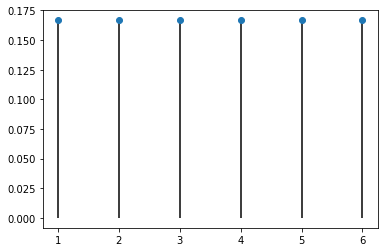

In [8]:
# 上記の確率分布を描画
# 離散型確率分布

x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
plt.plot(x, y, 'o') # oで点を描画
plt.vlines(x, 0, y) # (x, ymin, ymax)

## Probability Density Function(確率密度関数)と連続型確率分布

[![Image from Gyazo](https://i.gyazo.com/3720ce9597370f2c2a85905ad6a4d0ca.png)](https://gyazo.com/3720ce9597370f2c2a85905ad6a4d0ca)

**面積を求めること＝確率を求めること**、になる

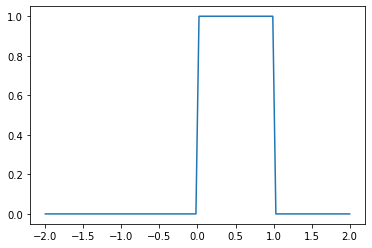

In [10]:
# 連続型確率分布

x = np.linspace(-2, 2, 100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x, y)

# Cumulative Disrtribution Function(CDF):累積分布関数
PDF(確率密度関数)を負の無限大から、ある値（x）まで確率を積み上げた値を返す関数。

PDFではある値における確率を知るには面積を求める必要があったが、CDFではそれがすぐにわかる。

[![Image from Gyazo](https://i.gyazo.com/b965a85518cf4f1149199921a2483a7f.png)](https://gyazo.com/b965a85518cf4f1149199921a2483a7f)

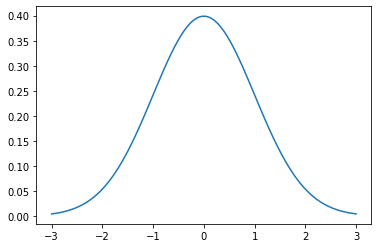

In [13]:
# PDF
x = np.linspace(-3, 3 , 100)
y = stats.norm.pdf(x)
plt.plot(x, y)

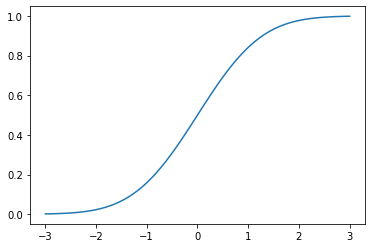

In [14]:
# 上記のCDF
y = stats.norm.cdf(x)
plt.plot(x, y)

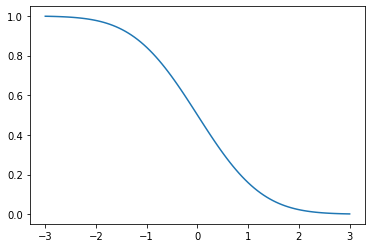

In [15]:
# 1-CDF
y = stats.norm.sf(x)
plt.plot(x, y)

# Normal Distribution(正規分布)

平均$\mu$と分散N$\sigma^2$で形状が決まる

$\large
\begin{align}
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( – \frac{(x-\mu)^2}{2 \sigma^2} \right)
\end{align}$

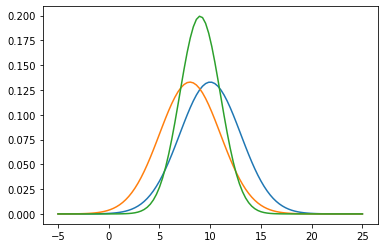

In [26]:
x = np.linspace(-5, 25, 100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=9, scale=2).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

# Kerhel Density Estimation:KDE(カーネル密度推定)

[![Image from Gyazo](https://i.gyazo.com/3b6a0d5f65eb0b8578f4694f244dabd5.png)](https://gyazo.com/3b6a0d5f65eb0b8578f4694f244dabd5)

22歳のカーネル、29歳のカーネル、39歳のカーネルを足し合わせてKDEを完成させ、確率密度関数を推定する。

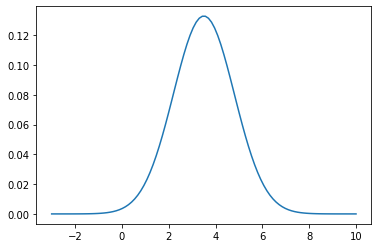

In [28]:
x = np.linspace(-3, 10, 100)
stats.gaussian_kde([1, 1, 2, 2, 3, 4, 5]).pdf(x)
plt.plot(x, y)

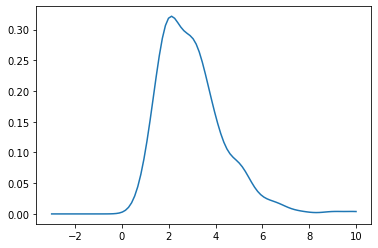

In [29]:
# レストランのデータセットで、チップのKDEを推定する

x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(df['tip']).pdf(x)
plt.plot(x, y)

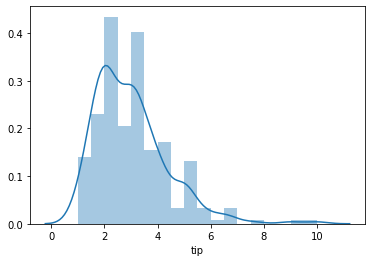

In [31]:
# 上記のKDEをヒストグラムと共に描画する

sns.distplot(df['tip'], kde=True)

In [37]:
# 上記のKDEを今週のデータと仮定し、このKDEを元にして、来週のチップのKDEを予測したい

resample_data = stats.gaussian_kde(df['tip']).resample()# ベースのKDEから来週のチップのデータをランダムにリサンプル
resample_data

array([[ 5.89285514,  1.65393046,  4.86400419,  1.62559696,  0.92173891,
         1.67198161,  3.42022653,  3.86050954,  2.53851922,  4.77452178,
         6.85945984,  4.8135586 ,  4.28162398,  2.70253531,  1.78619091,
         3.01499767,  3.13541946,  2.95571674,  1.17949104,  1.5229611 ,
         2.83232387,  3.31441483,  2.5184686 ,  1.70998312,  1.71080401,
         2.86441854,  1.4808762 ,  4.82464181,  1.20074326,  2.39451739,
         4.18173601,  4.82060226,  4.25653602,  4.57160217,  2.6819835 ,
         1.86328968,  3.53088006,  5.50957674,  3.83266336,  1.6818916 ,
         4.15134962,  1.19663775,  3.59054548,  2.80490657,  2.24632655,
         1.40432809,  1.88124011,  3.12070598,  0.60888799,  0.76743677,
         1.88576745,  3.94529707,  3.41714241,  8.29485636,  4.47507319,
         3.51974244,  0.71223521,  2.56692141,  4.12119406,  2.08040286,
         2.31884376,  2.88726945,  3.4581002 ,  4.76622826,  2.02326044,
         0.66307401,  2.16448206,  3.28834289,  1.6

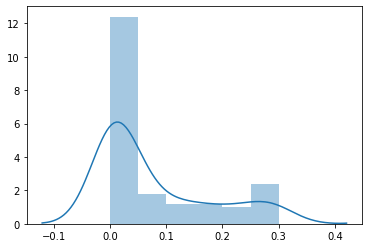

In [42]:
# 予測したKDEを生成, 描画

x = np.linspace(-3, 10, 100)
y = stats.gaussian_kde(resample_data).pdf(x)
sns.distplot(y, kde=True)